In [1]:
import pandas as pd

In [47]:
x1 = pd.read_csv(r'ARP_MitM_dataset.csv/ARP_MitM_dataset.csv',header=None)
x1

,0,1,2,3,4,5,6,7,8,9,...,105,106,107,108,109,110,111,112,113,114
0,1.000000,1294.000000,0.000000e+00,1.000000,1294.000000,0.000000e+00,1.000000,1294.000000,0.000000e+00,1.000000,...,0.000000e+00,0.0,0.0,1.000000,1294.000000,0.000000,1294.000000,0.000000e+00,0.0,0.0
1,1.000000,1514.000000,0.000000e+00,1.000000,1514.000000,0.000000e+00,1.000000,1514.000000,0.000000e+00,1.000000,...,0.000000e+00,0.0,0.0,1.000000,1514.000000,0.000000,1514.000000,0.000000e+00,0.0,0.0
2,1.999505,1294.000000,6.984919e-10,1.999703,1294.000000,2.328306e-10,1.999901,1294.000000,6.984919e-10,1.999990,...,0.000000e+00,0.0,0.0,1.999999,1294.000000,0.000000,1294.000000,0.000000e+00,0.0,0.0
3,2.998985,1294.000000,9.313226e-10,2.999391,1294.000000,4.656613e-10,2.999797,1294.000000,6.984919e-10,2.999980,...,6.984919e-10,0.0,0.0,2.999998,1294.000000,0.000015,1294.000000,2.328306e-10,0.0,0.0
4,3.998061,1294.000000,9.313226e-10,3.998836,1294.000000,2.328306e-10,3.999612,1294.000000,6.984919e-10,3.999961,...,2.328306e-10,0.0,0.0,3.999996,1294.000000,0.000000,1294.000000,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504262,380.551133,1331.684771,1.895906e+05,650.148549,1336.357995,1.865743e+05,1973.033776,1339.428666,1.851917e+05,19664.853626,...,1.813631e+05,0.0,0.0,28040.717202,1341.152101,425.618618,1341.152101,1.811512e+05,0.0,0.0
2504263,379.629067,1332.165017,1.891785e+05,649.176314,1336.631637,1.863354e+05,1972.036680,1339.517190,1.851133e+05,19663.862251,...,1.813090e+05,0.0,0.0,28041.433233,1341.158265,425.612280,1341.158265,1.811458e+05,0.0,0.0
2504264,380.276647,1332.643182,1.887678e+05,649.814659,1336.904590,1.860970e+05,1972.670406,1339.605640,1.850348e+05,19664.496996,...,1.812549e+05,0.0,0.0,28042.381146,1341.164429,425.605943,1341.164429,1.811404e+05,0.0,0.0
2504265,379.354717,1333.121248,1.883566e+05,648.842152,1337.177530,1.858584e+05,1971.672375,1339.694090,1.849564e+05,19663.504357,...,1.812009e+05,0.0,0.0,28043.096975,1341.170592,425.599606,1341.170592,1.811350e+05,0.0,0.0


In [13]:
y1 = pd.read_csv(r'ARP_MitM_labels.csv')
y1

,Unnamed: 0,x
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
2504262,2504263,1
2504263,2504264,1
2504264,2504265,1
2504265,2504266,1


In [14]:
y1.drop('Unnamed: 0', inplace=True, axis=1)
y1

,x
0,0
1,0
2,0
3,0
4,0
...,...
2504262,1
2504263,1
2504264,1
2504265,1


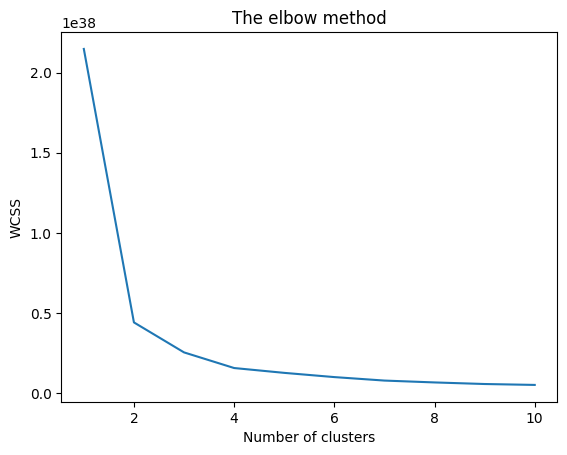

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=200,n_init=10,random_state=0)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
# plotting the graph to observe the elbow
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
kmeans=KMeans(n_clusters=2,init='k-means++',max_iter=200,n_init=10,random_state=0)
ykmeans=kmeans.fit_predict(x1)

In [35]:
import numpy as np
x1=np.array(x1)

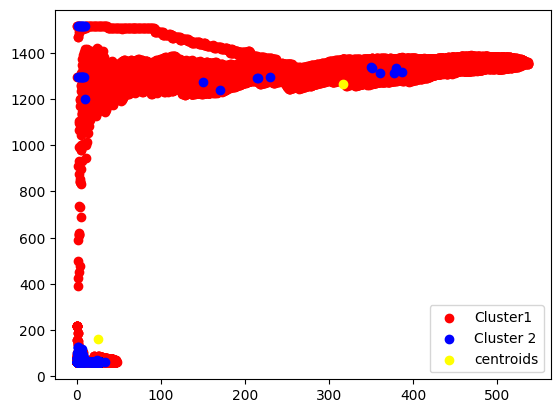

In [44]:
# represing the clusters visually
plt.scatter(x1[ykmeans==0,0],x1[ykmeans==0,1],c='red',label='Cluster1')
plt.scatter(x1[ykmeans==1,0],x1[ykmeans==1,1],c='blue',label='Cluster 2')
# plotting centroids of cluster
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='yellow',label='centroids')
plt.legend()